# Handwritten Digit Prediction

In [1]:
import numpy as np
import pandas as pd
import tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
import sklearn 

In [2]:
(X_train , y_train),(X_test,y_test)=keras.datasets.mnist.load_data()
X_train.shape

(60000, 28, 28)

In [3]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [4]:
import matplotlib.pyplot as plt
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

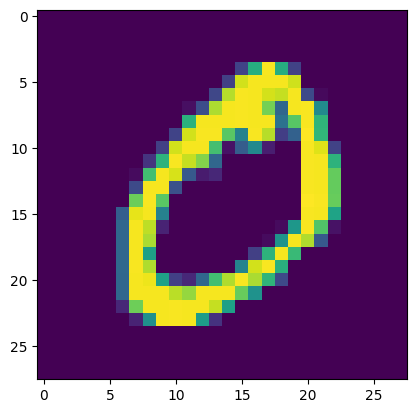

In [5]:
plt.imshow(X_train[1])

In [6]:
X_train=X_train/255
X_test=X_test/255

In [7]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

c:\Users\kunal\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8709 - loss: 0.4589 - val_accuracy: 0.9537 - val_loss: 0.1589
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9600 - loss: 0.1383 - val_accuracy: 0.9666 - val_loss: 0.1145
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9725 - loss: 0.0927 - val_accuracy: 0.9657 - val_loss: 0.1124
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9789 - loss: 0.0716 - val_accuracy: 0.9713 - val_loss: 0.1004
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9838 - loss: 0.0578 - val_accuracy: 0.9732 - val_loss: 0.0940
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9862 - loss: 0.0452 - val_accuracy: 0.9719 - val_loss: 0.1041
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9895 - loss: 0.0399 - val_accuracy: 0.9718 - val_loss: 0.1034
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9890 - loss: 0.0352 - 

In [9]:
y_prob=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [10]:
y_pred=y_prob.argmax(axis=1)

In [11]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9787


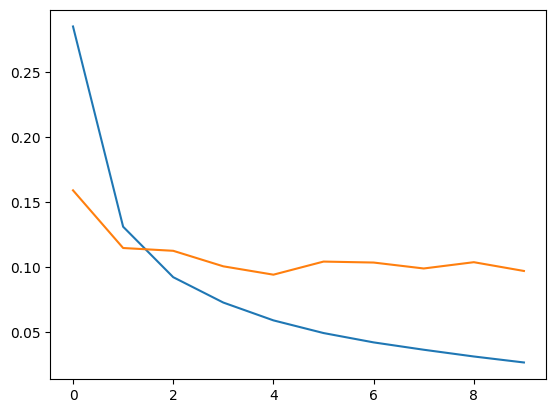

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

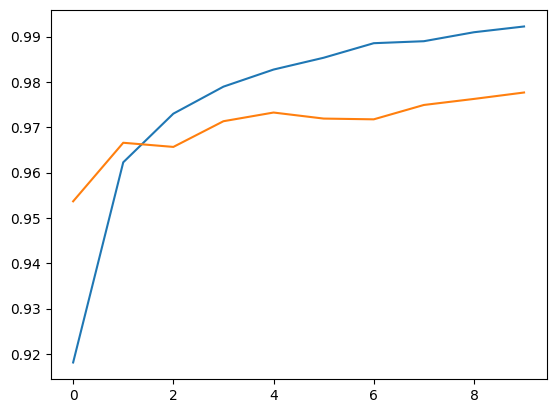

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

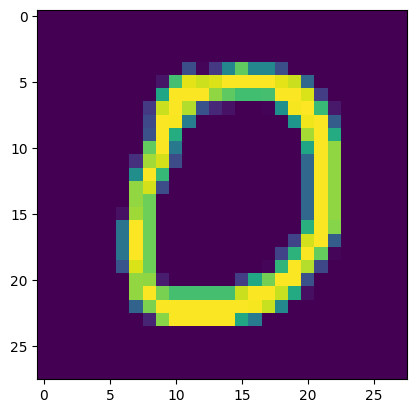

In [14]:
plt.imshow(X_test[10])

In [15]:
model.predict(X_test[10].reshape([1,28,28])).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([0], dtype=int64)

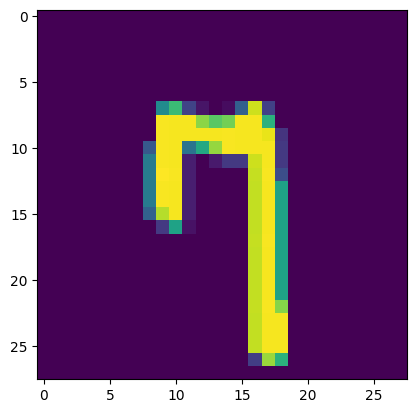

In [16]:
plt.imshow(X_test[80])

In [17]:
model.predict(X_test[80].reshape([1,28,28])).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([7], dtype=int64)